In [0]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

Individual_Details_url="IndividualDetails.csv"
Individual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-in-india.zip
replace AgeGroupDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [4]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
Individual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"
Individual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])
"""

'\nIndividual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"\nIndividual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])\n'

In [5]:
Individual_Details.tail(10)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
27880,27881,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27881,27882,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27882,27883,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27883,27884,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27884,27885,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27885,27886,NaN,2020-04-26,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,2020-04-26,Details awaited
27886,27887,NaN,2020-04-26,NaN,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,2020-04-26,Details awaited
27887,27888,NaN,2020-04-26,12,F,NaN,Munger,Bihar,NaN,Hospitalized,2020-04-26,Details awaited
27888,27889,NaN,2020-04-26,13,F,NaN,Munger,Bihar,NaN,Hospitalized,2020-04-26,Details awaited
27889,27890,NaN,2020-04-26,17,F,NaN,Munger,Bihar,NaN,Hospitalized,2020-04-26,Details awaited


In [6]:
#Computing districts which are hotspots
Individual_Details=Individual_Details.loc[Individual_Details.diagnosed_date<=pd.to_datetime('10/04/2020',format='%d/%m/%Y')]
Individual_Details=Individual_Details.loc[(Individual_Details.current_status=="Hospitalized") | (Individual_Details.status_change_date>=pd.to_datetime('10/04/2020',format='%d/%m/%Y'))]
district_hotspots = pd.DataFrame(Individual_Details.groupby(["detected_state", "detected_district"]).id.count().loc[Individual_Details.groupby(["detected_state","detected_district"]).id.count()>=10].sort_values(ascending=False))
district_hotspots = district_hotspots.reset_index()
row = pd.DataFrame({"detected_state":["Delhi"], "detected_district":["NaN"],'id':Individual_Details.loc[Individual_Details.detected_state=='Delhi'].id.count()})
district_hotspots=district_hotspots.append(row)
district_hotspots=district_hotspots.sort_values(by=['id'],ascending=False)
district_hotspots

,detected_state,detected_district,id
0,Maharashtra,Mumbai,1006
0,Delhi,NaN,899
1,Maharashtra,Pune,238
2,Madhya Pradesh,Indore,234
3,Telangana,Hyderabad,223
...,...,...,...
124,Telangana,Mahabubnagar,10
125,Karnataka,Belagavi,10
126,Karnataka,Bidar,10
127,Karnataka,Chikkaballapura,10


Text(0.5, 1.0, 'Data of Districts which are Hotspots')

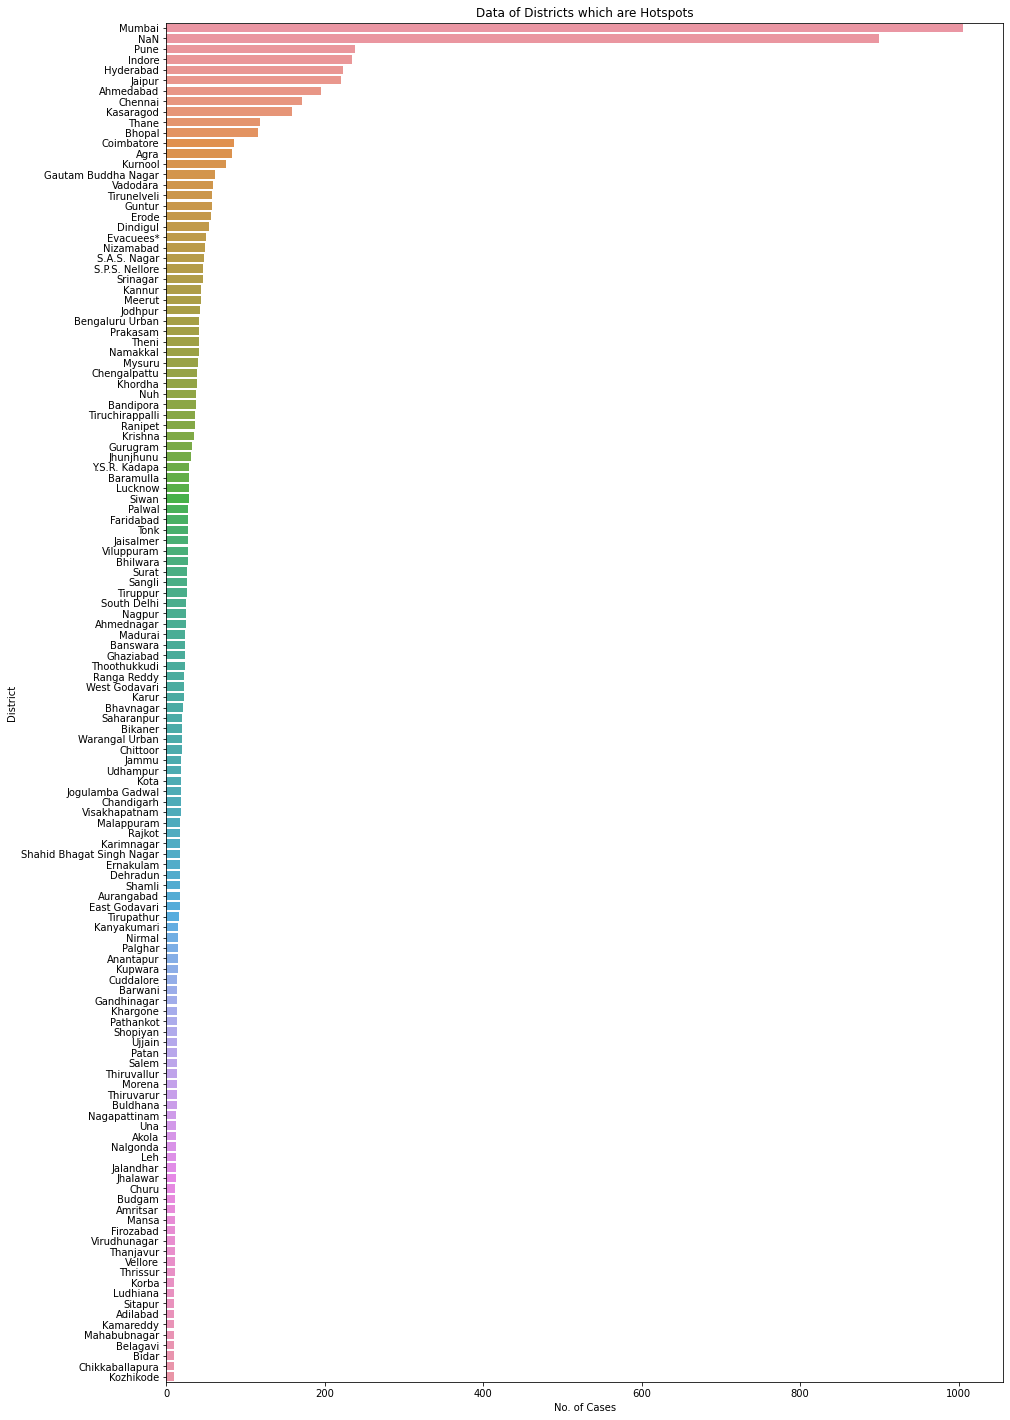

In [10]:
#Displaying districts which are hotspots
plt.figure(figsize=(15,25))
sns.barplot(x=district_hotspots.id, y=district_hotspots.detected_district)
plt.xlabel("No. of Cases")
plt.ylabel("District")
plt.title("Data of Districts which are Hotspots")

In [11]:
#State-Wise Hotspots
Individual_Details=Individual_Details.loc[Individual_Details.diagnosed_date<=pd.to_datetime('10/04/2020',format='%d/%m/%Y')]
district_hotspots_states = pd.DataFrame(Individual_Details.groupby(["detected_state","detected_district"]).id.count().loc[Individual_Details.groupby(["detected_state","detected_district"]).id.count()>=10].sort_values(ascending=False))
district_hotspots_states=district_hotspots_states.sort_values(by=['detected_state'],ascending=True)
district_hotspots_states.head()

id
detected_state detected_district    
Andhra Pradesh Chittoor           20
               Y.S.R. Kadapa      29
               Kurnool            76
               Anantapur          15
               S.P.S. Nellore     47